In [13]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt

sa=9
%matplotlib inline

### Ejercicio

Use el metodo dbscan aplicando el algoritmo en diferentes datasets

In [14]:
dfcan = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
dfcan.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


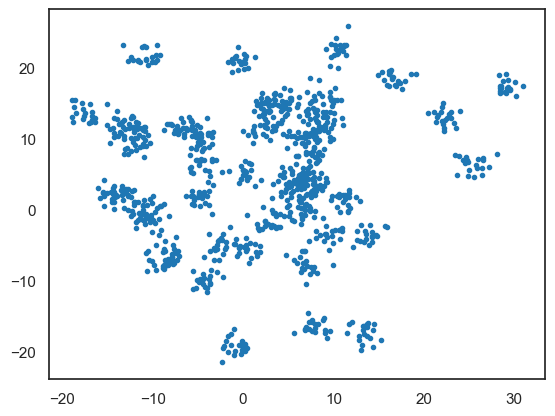

In [15]:
plt.scatter(dfcan['x'], dfcan['y'], s=sa)
plt.show()

In [28]:
clusters= DBSCAN(eps=2, min_samples=10)
clusters.fit(dfcan)
#dfcan['C']=clusters.labels_
print(f'Grupos encontrados {len(set(clusters.labels_)- set([-1]))} grupos y {(clusters.labels_==-1).sum()} puntos de ruido.') 

Grupos encontrados 15 grupos y 3 puntos de ruido.


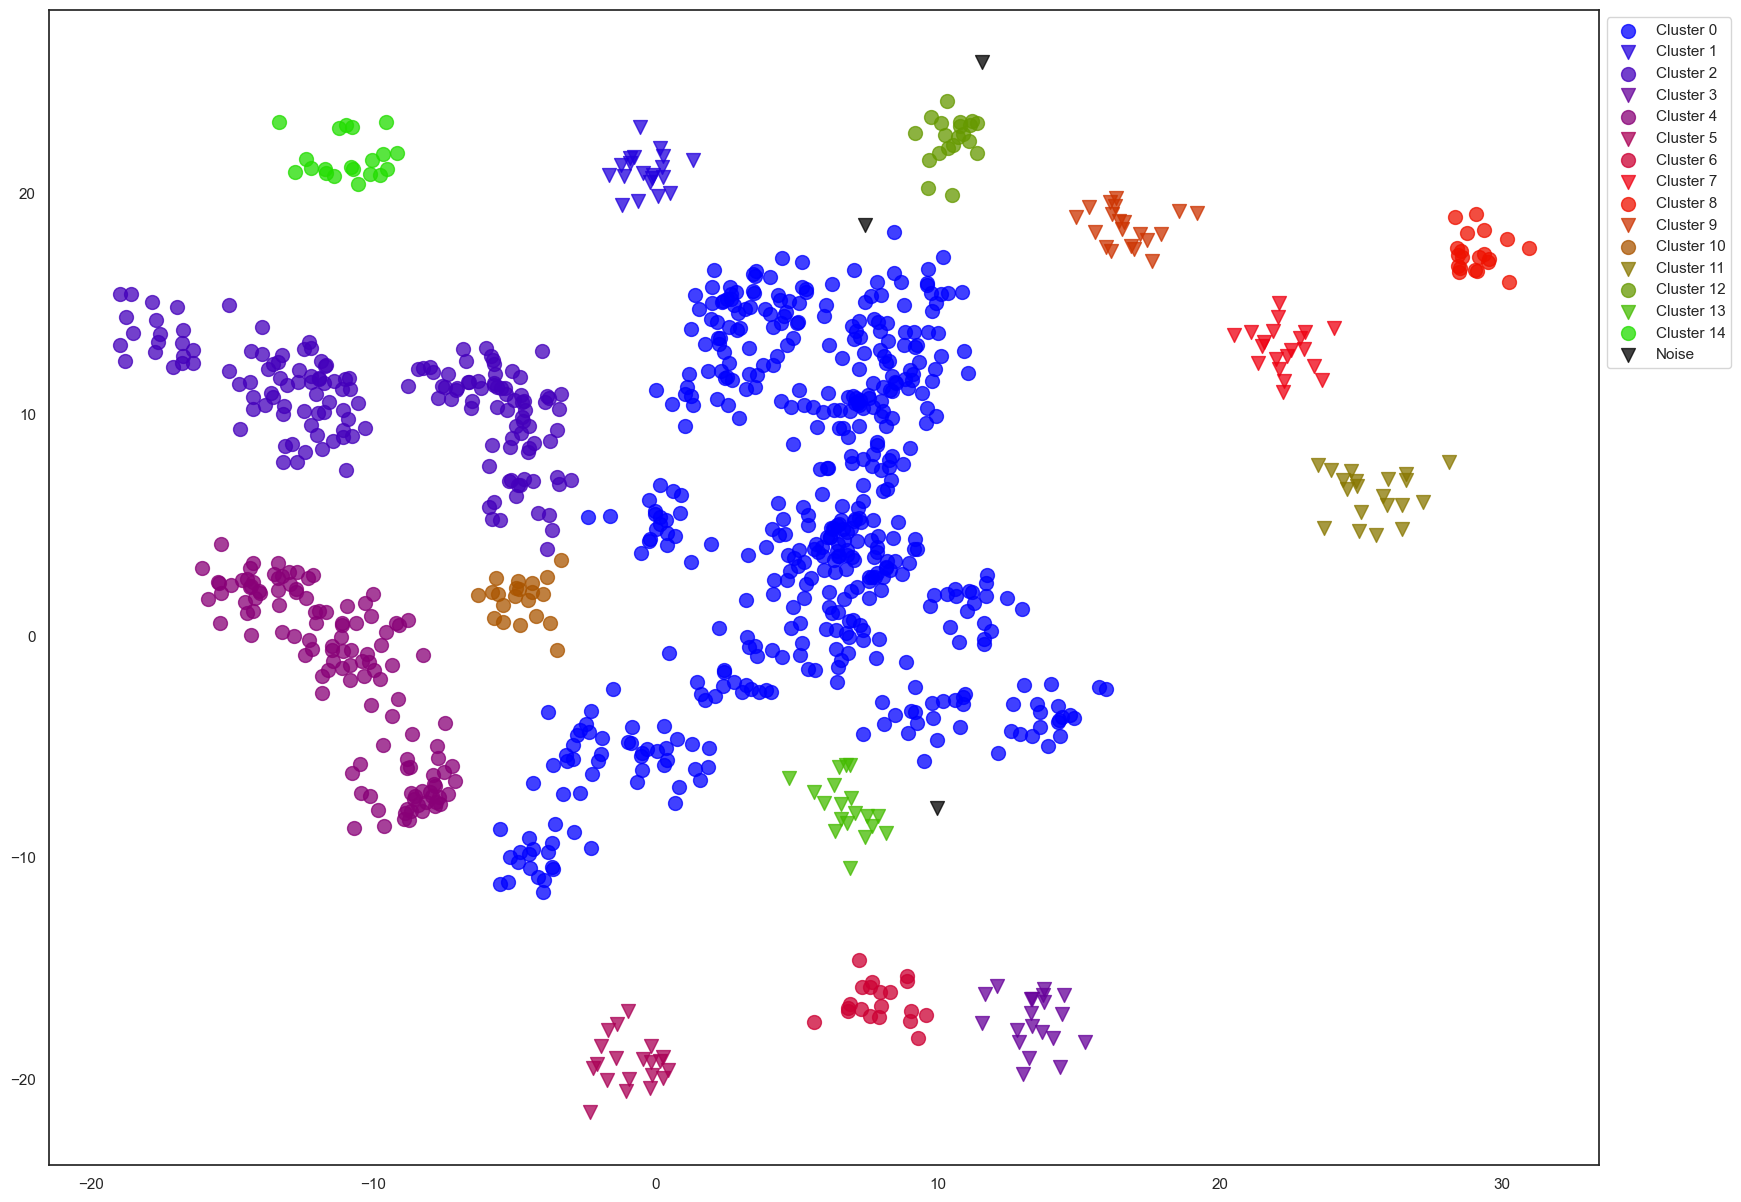

In [74]:
etiquetas= set(clusters.labels_)
neti=len(etiquetas)
cmap=plt.cm.get_cmap('brg',neti)
#dfcan.groupby(by=["C"]).plot.scatter(x='x',y='y')
plt.rcParams['figure.figsize'] = (20,15)
cmap = plt.cm.get_cmap('brg', neti)
for l in etiquetas:
            plt.scatter(
                dfcan['x'][clusters.labels_==l],
                dfcan['y'][clusters.labels_==l],
                c=[cmap(l) if l >= 0 else 'Black'],
                marker='ov'[l%2],
                alpha=0.75,
                s=100,
                label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [30]:
#print(clusters.labels_)

In [31]:
ruido=np.where(clusters.labels_==-1)[0]
print(ruido)

[ 24 198 738]


In [32]:
porcen=len(ruido)/len(clusters.labels_)

In [33]:
print(porcen*100)

0.3


In [34]:
print(clusters.labels_.shape)

(1000,)


In [75]:
#for i in etiquetas:
            #print(dfcan['x'][ clusters.labels_==i])
            #break